## Sprint_機械学習スクラッチ_クラスタリング

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

In [2]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

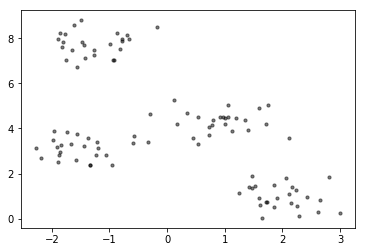

In [3]:
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.show()

In [4]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters = 4, n_init = 3, max_iter = 100, tol = 1e-4, verbose=False , random_state=1):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  = tol
        self.verbose = verbose

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        self.SSE_n_init = np.zeros(self.n_init)
        self.νk_d = np.zeros((self.n_init , self.n_clusters , X.shape[1]) , dtype = np.int)
        """""
        異なる初期値で計算
        """
        for i in range(self.n_init):
            self.center_point(X)
            self.SSE_iter = []
            for k in range(self.max_iter):
                self._Euclid(X)
                self._move_center(X)
                self.SSE_iter.append(self._SSE())
                
                if k >= 1:
                    if self.SSE_iter[-2] == self.SSE_iter[-1]:
                        break
                self.SSE_n_init[i] = self.SSE_iter[-1]
                self.νk_d[i , : , :] = self.νk 
        
        self.result = self.νk_d[self.SSE_n_init.argmin() , : , :]
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(i , self.νk)
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        
        self.distance = np.zeros((X.shape[0] , self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[: , i] = np.linalg.norm(X - self.result[i , :] , axis = 1)
        
        self.y_pred = self.distance.argmin(axis = 1)
        return self.y_pred
    
    def center_point(self , X):
        """
        中心点の初期値
        """
        points = np.repeat(1 / X.shape[0] , X.shape[0])
        X_size = X.shape[0]
        self.νk  = X[np.random.choice(X_size,  self.n_clusters , replace=False)]
        return self.νk
    
    def _SSE(self):
        self.sse = np.sum(self.distance.min(axis = 1))
        return self.sse
    
    def _Euclid(self , X):
        """"
        クラスタへの割り当て
        """
        self.distance = np.zeros((X.shape[0] , self.n_clusters))
        
        for i in range(self.n_clusters):
            self.distance[: , i] = np.linalg.norm(X - self.νk[i , :] , axis = 1)
            self.y_pred = self.distance.argmin(axis = 1)
            
    def _move_center(self , X):
        """
        中心点の移動
        """
        move_point = np.zeros((self.n_clusters , X.shape[1]))
        
        for k in range(self.n_clusters):
            move_point[k , :] = X[self.y_pred == k , :].mean(axis = 0)
        self.νk = move_point

## 【問題1】中心点の初期値を決める

入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [5]:
#ランダムに重心の初期値を初期化
random.seed(0)
k = 3
X_size = X.shape[0]
ν  = X[np.random.choice(X_size, k , replace=False)]
# centroids = X[νk, :]

## 【問題2】SSEを求める関数の作成

In [6]:
def _SSE(distance):
    sse=distance.min(axis=1).sum()
    return sse

## 【問題3】クラスタへの割り当て

全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

In [7]:
def _Euclid(self , X):
        """"
        クラスタへの割り当て
        """
        self.distance = np.zeros((X.shape[0] , self.n_clusters))
        
        for i in range(self.n_clusters):
            self.distance[: , i] = np.linalg.norm(X - self.νk[i , :] , axis = 1)
            self.y_pred = self.distance.argmin(axis = 1)

## 【問題4】中心点の移動

中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。

クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [8]:
    def _move_center(self , X):
        """
        中心点の移動
        """
        move_point = np.zeros((self.n_clusters , X.shape[1]))
        
        for k in range(self.n_clusters):
            move_point[k , :] = X[self.y_pred == k , :].mean(axis = 0)
        self.νk = move_point

## 【問題6】異なる初期値で計算

In [9]:
kmeans_2 = ScratchKMeans()

In [10]:
kmeans_2.fit(X)

In [11]:
y_2 = kmeans_2.predict(X)

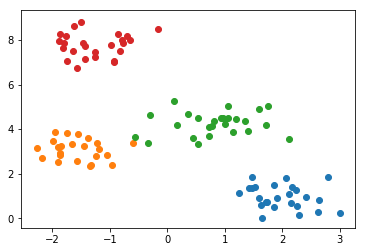

In [12]:
for i in range(4):
    plt.scatter( X[ y_2 == i , 0] , X[ y_2 == i , 1])

In [13]:
kmeans = ScratchKMeans()

In [14]:
# kmeans.fit(X)

In [15]:
# kmeans.predict(X)

In [16]:
# kmeans.sse

## 【問題7】推定

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(X , test_size = 0.25)

In [18]:
kmeans.fit(X_train)

In [19]:
kmeans.predict(X_test)

array([3, 0, 1, 3, 2, 2, 1, 3, 2, 1, 3, 2, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1,
       0, 3, 3])

In [20]:
y = kmeans.predict(X)

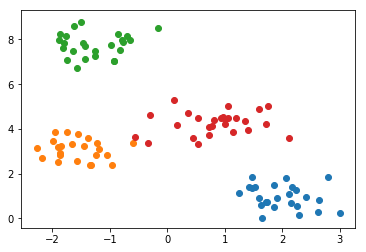

In [21]:
for i in range(4):
    plt.scatter( X[ y == i , 0] , X[ y == i , 1])

## 【問題8】エルボー法の実装

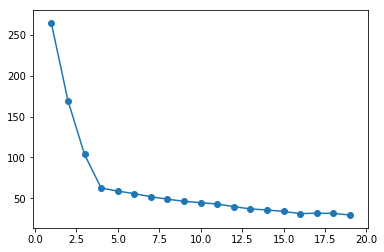

In [22]:
kmeans_3 = ScratchKMeans()
SSE_list = []
for i in range(1 , 20):
    kmeans_3 = ScratchKMeans(i)
    kmeans_3.fit(X)
    SSE_list.append(kmeans_3.SSE_n_init.min())
plt.plot(range(1,20),SSE_list)
plt.scatter(range(1,20),SSE_list)
plt.show()

## 3.クラスタ分析

クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

UCI Machine Learning Repository: Wholesale customers Data Set

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

## 【問題11】既知のグループとの比較

FRESH：新鮮な製品の年間支出

MILK：乳製品の年間支出

GROCERY：食料品の年間支出

FROZEN：冷凍製品の年間支出

DETERGENTS_PAPER：洗剤および紙製品の年間支出

DELICATESSEN：年間支出（mu）およびデリカテッセン製品

CHANNEL：顧客-チャネル（1 : Horeca（ホテル/レストラン/カフェ）または2 : 小売チャネル（公称）

REGION：顧客-地域-Lisnon、Oportoまたはその他（公称）

1 : リスボン77
2 : ポルト47
3 : その他の地域316

In [23]:
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [25]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [26]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [27]:
##RegionとChannelは取り覗き、金額のデータでK-meansを利用
#対数化
data_log= np.log(data)

data_d = data_log.iloc[: , 2:]
data_c = data.iloc[: , 0]
data_r = data.iloc[: , 1]
data_d.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


## 次元削減

金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [28]:
##標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(data_d)
data_d_std = std.fit_transform(data_d)

In [29]:
#次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_d_std)
data_pca = pca.transform(data_d_std)

[0.43990911 0.71118573 0.81875328 0.92020054 0.96926786 1.        ]


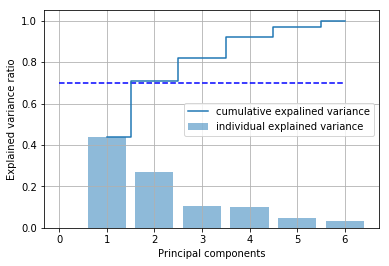

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data_d_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

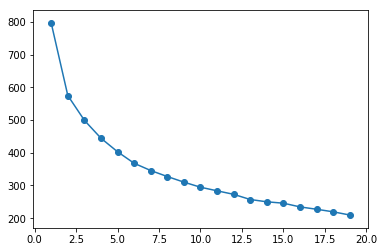

In [31]:
SSE_list = []
for i in range(1 , 20):
    kmeans_3 = ScratchKMeans(i)
    kmeans_3.fit(data_pca)
    SSE_list.append(kmeans_3.SSE_n_init.min())
plt.plot(range(1,20),SSE_list)
plt.scatter(range(1,20),SSE_list)
plt.show()

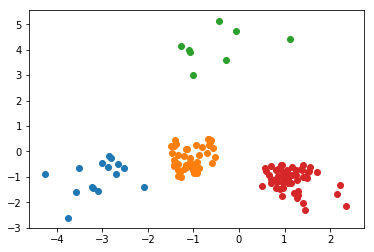

In [32]:
y = kmeans_3.predict(data_pca)
for i in range(4):
    plt.scatter(data_pca[ y == i , 0] , data_pca[ y == i , 1])

In [33]:
pca.explained_variance_ratio_

array([0.43990911, 0.27127662, 0.10756755, 0.10144726, 0.04906732,
       0.03073214])

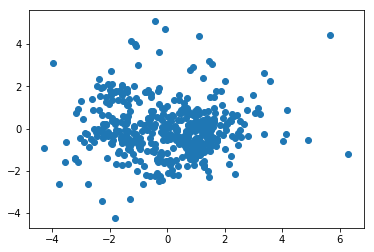

In [34]:
plt.scatter(data_pca[: , 0] , data_pca[: , 1])
plt.show()

## 【問題10】クラスタ数kの選択

今回は傾きが緩やかになる始まりの4を選択する

## 【問題11】既知のグループとの比較

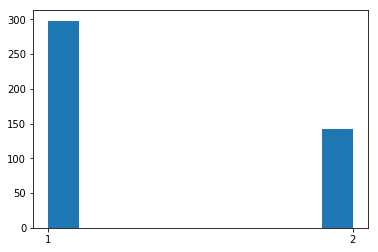

In [35]:
plt.hist(data_c)
plt.xticks([1,2])
plt.show()

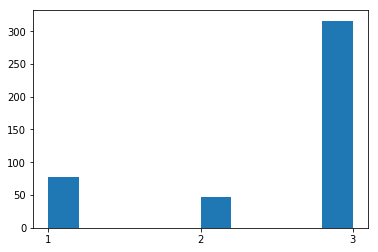

In [36]:
plt.hist(data_r)
plt.xticks([1,2,3])
plt.show()

上記の図よりChannelは１、Regionは３にだいぶ偏りがあると受け取れる

In [37]:
data_c1 = data.query("Channel==1")
data_c2 = data.query("Channel==2")
data_r1 = data.query("Region==1")
data_r2 = data.query("Region==2")
data_r3 = data.query("Region==3")

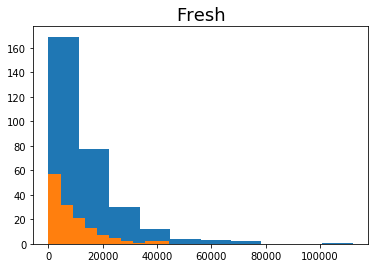

In [38]:
plt.hist(data_c1.loc[: , "Fresh"])
plt.hist(data_c2.loc[: , "Fresh"])
plt.title("Fresh" , fontsize = 18)
plt.show()

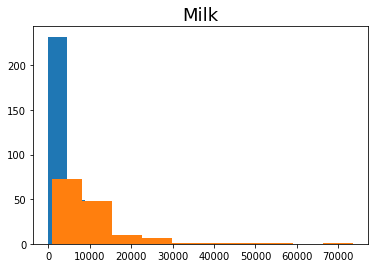

In [39]:
plt.hist(data_c1.loc[: , "Milk"])
plt.hist(data_c2.loc[: , "Milk"])
plt.title("Milk" , fontsize = 18)
plt.show()

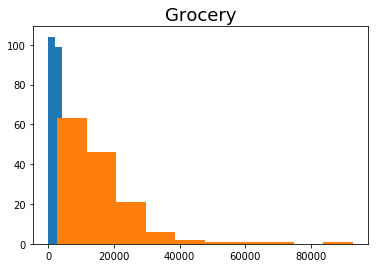

In [40]:
plt.hist(data_c1.loc[: , "Grocery"])
plt.hist(data_c2.loc[: , "Grocery"])
plt.title("Grocery" , fontsize = 18)
plt.show()

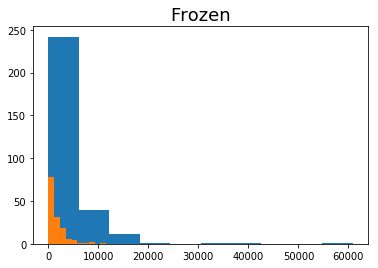

In [41]:
plt.hist(data_c1.loc[: , "Frozen"])
plt.hist(data_c2.loc[: , "Frozen"])
plt.title("Frozen" , fontsize = 18)
plt.show()

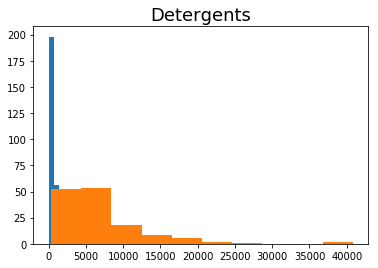

In [42]:
plt.hist(data_c1.loc[: , "Detergents_Paper"])
plt.hist(data_c2.loc[: , "Detergents_Paper"])
plt.title("Detergents" , fontsize = 18)
plt.show()

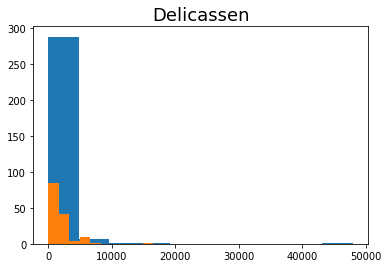

In [43]:
plt.hist(data_c1.loc[: , "Delicassen"])
plt.hist(data_c2.loc[: , "Delicassen"])
plt.title("Delicassen" , fontsize = 18)
plt.show()

上記のヒストグラムはChannel１、２に対する各特徴量の割合である
Grocery , Detergentsで２が多く支出を出している

In [44]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [45]:
kmeans_i = ScratchKMeans(n_clusters = 4)
kmeans_i.fit(data_pca)
y_pca = kmeans_i.predict(data_pca)

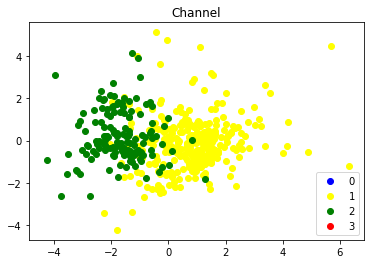

In [46]:
n_clusters = 4
color = ["blue" , "yellow" ,"green" , "red"]
for i in range(4):
    plt.scatter(data_pca[data["Channel"]==i , 0] , data_pca[data["Channel"]==i , 1] , label = i ,color = color[i])
plt.legend()
plt.title("Channel" , fontsize=12)
plt.show()

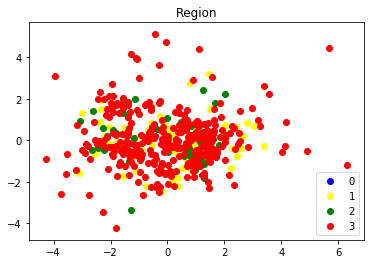

In [47]:
n_clusters = 4
color = ["blue" , "yellow" ,"green" , "red"]
for i in range(4):
    plt.scatter(data_pca[data["Region"]==i , 0] , data_pca[data["Region"]==i , 1] , label = i ,color = color[i])
plt.legend()
plt.title("Region" , fontsize=12)
plt.show()

In [48]:
data_pca[data["Region"]==0, 0]

array([], dtype=float64)

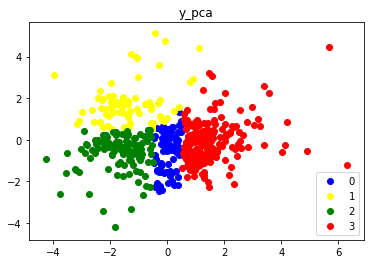

In [49]:
n_clusters = 4
color = ["blue" , "yellow" ,"green" , "red"]
for i in range(4):
    plt.scatter(data_pca[y_pca == i , 0] , data_pca[y_pca ==i , 1] , label = i ,color = color[i])
plt.legend()
plt.title("y_pca" , fontsize=12)
plt.show()

## 【問題12】卸売業者にとって有益な情報

In [63]:
data_2 = data.copy()
data_2["SKMclass"] = y_pca

In [65]:
data_2.groupby(["Channel","Region","SKMclass"]).sum().round()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region SKMclass                                                       
1       1      0          280451   46488    54537   59664             13205   
               1            8712   27190    23655    2775              5885   
               2           98433  104091    92904   28083             22585   
               3          373637   50573    66446   93990             14406   
        2      0           48206   11536    34184    4799              4443   
               2           32717   16784    13626   60869              1272   
               3          245292   36199    75264   95193              7801   
        3      0          828754  250916   225801  238794             42146   
               1           78693  105371   155918   12365             53937   
               2          382036  163635   185246   99185             31466   
               3         1638786  215831   253136  421262             38441   
2       1      0           13862    8516    10880   13933              1743   
               1           12695   62935   122101    6569             53556   
               2           67043  122661   199514   26012             92756   
        2      1           30380   73974   182909    7368            105025   
               2           91303   99723   124548   10344             54438   
               3           16823     928     2743   11559               332   
        3      0           97267   20169    29546   13379              9657   
               1           82063  275893   492517   12411            214003   
               2          839832  855820  1148564  131676            500211   
               3           13146    1124     4523    1420               549   

                         Delicassen  
Channel Region SKMclass              
1       1      0              16206  
               1               1581  
               2              24413  
               3              28432  
        2      0               6131  
               2               5609  
               3              19225  
        3      0              93112  
               1              11079  
               2             115583  
               3             100584  
2       1      0               3497  
               1              12716  
               2              17482  
        2      1               5824  
               2              14231  
               3               3486  
        3      0               4015  
               1              26578  
               2             160662  
               3                497

In [66]:
data_2.groupby(["Channel","Region","SKMclass"]).mean().round()

Fresh     Milk  Grocery   Frozen  Detergents_Paper  \
Channel Region SKMclass                                                         
1       1      0         23371.0   3874.0   4545.0   4972.0            1100.0   
               1          2178.0   6798.0   5914.0    694.0            1471.0   
               2          9843.0  10409.0   9290.0   2808.0            2258.0   
               3         11322.0   1533.0   2014.0   2848.0             437.0   
        2      0          9641.0   2307.0   6837.0    960.0             889.0   
               2         32717.0  16784.0  13626.0  60869.0            1272.0   
               3         11150.0   1645.0   3421.0   4327.0             355.0   
        3      0         16575.0   5018.0   4516.0   4776.0             843.0   
               1          3577.0   4790.0   7087.0    562.0            2452.0   
               2         25469.0  10909.0  12350.0   6612.0            2098.0   
               3         13216.0   1741.0   2041.0   3397.0             310.0   
2       1      0          6931.0   4258.0   5440.0   6966.0             872.0   
               1          1814.0   8991.0  17443.0    938.0            7651.0   
               2          7449.0  13629.0  22168.0   2890.0           10306.0   
        2      1          3376.0   8219.0  20323.0    819.0           11669.0   
               2         10145.0  11080.0  13839.0   1149.0            6049.0   
               3         16823.0    928.0   2743.0  11559.0             332.0   
        3      0         19453.0   4034.0   5909.0   2676.0            1931.0   
               1          2647.0   8900.0  15888.0    400.0            6903.0   
               2         12350.0  12586.0  16891.0   1936.0            7356.0   
               3         13146.0   1124.0   4523.0   1420.0             549.0   

                         Delicassen  
Channel Region SKMclass              
1       1      0             1350.0  
               1              395.0  
               2             2441.0  
               3              862.0  
        2      0             1226.0  
               2             5609.0  
               3              874.0  
        3      0             1862.0  
               1              504.0  
               2             7706.0  
               3              811.0  
2       1      0             1748.0  
               1             1817.0  
               2             1942.0  
        2      1              647.0  
               2             1581.0  
               3             3486.0  
        3      0              803.0  
               1              857.0  
               2             2363.0  
               3              497.0

In [50]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


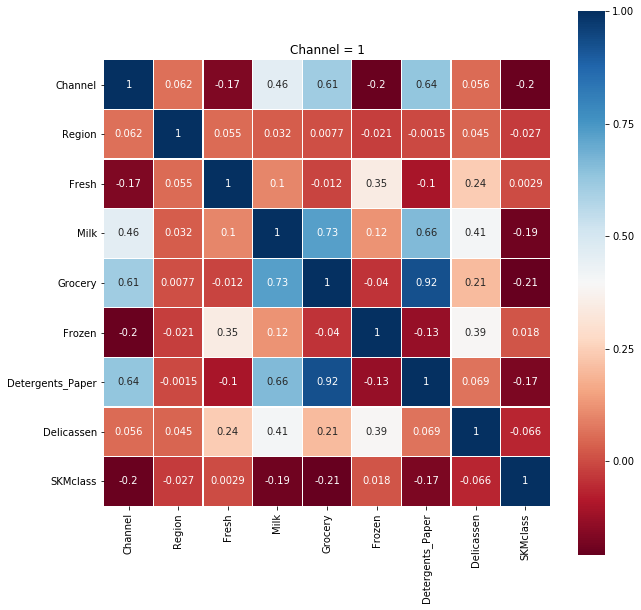

In [69]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.subplots(figsize=(10, 10))
plt.title('Channel = 1')
sns.heatmap(data_2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Channelのデータを見るにChannel１はホテルや飲食店とのこともありGROCERY、Detergents_Paper、Milkの消費が多く、賞味期限による食材の破棄を防ぐためにも長期保管も可能な食材が好まれると推測する
Channel２の一般家庭では安くて日持ちする冷凍食品が好まれる
REGIONは３に割合が偏っているが平均的に食料品、Milkの需要が見込める

FRESH：新鮮な製品の年間支出

MILK：乳製品の年間支出

GROCERY：食料品の年間支出

FROZEN：冷凍製品の年間支出

DETERGENTS_PAPER：洗剤および紙製品の年間支出

DELICATESSEN：年間支出（mu）およびデリカテッセン製品

CHANNEL：顧客-チャネル（1 : Horeca（ホテル/レストラン/カフェ）または2 : 小売チャネル（公称）

REGION：顧客-地域-Lisnon、Oportoまたはその他（公称）

1 : リスボン77 2 : ポルト47 3 : その他の地域316